In [6]:
# Imports

import os
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.lines import Line2D

# Path
dataDir = os.path.abspath("./Data/Histogram Data")
print("Reading from " + dataDir)

Reading from /Users/jonathanhasenburg/git/jupyter-examples/Data/Histogram Data


In [8]:
# Read in Data from CSV

# Format
# 0;mockfog;physical
# 1;16,4;16,538

data = []
header = ["ping", "mockfog", "physical"]
with open(dataDir + "/pings.csv", "r") as f:
    for i, line in enumerate(f):
        split = line.split(";")
        if i > 0:
            try:
                ping = int(split[0])
                mockfog = float(split[1].replace(",", ".").replace("\n", ""))
                physical = float("{0:.1f}".format(float(split[2].replace(",", "."))))
                
                if mockfog > 40:
                    print("MockFog {0!s} exceeds 40, skipping it".format(mockfog))
                    mockfog = None
                
                if physical > 40:
                    print("Physical {0!s} exceeds 40, skipping it".format(mockfog))
                    physical = None
                    
                data.append([ping, mockfog, physical])
            except ValueError:
                print("Entry at index {0!s} throws value error, assuming all data is parsed".format(i))
                break

df = pd.DataFrame(data,columns=header)

MockFog 47.5 exceeds 40, skipping it
MockFog 48.9 exceeds 40, skipping it
MockFog 58.8 exceeds 40, skipping it
MockFog 42.3 exceeds 40, skipping it
MockFog 54.2 exceeds 40, skipping it
MockFog 150.0 exceeds 40, skipping it
MockFog 65.1 exceeds 40, skipping it
MockFog 152.0 exceeds 40, skipping it
MockFog 52.5 exceeds 40, skipping it
Entry at index 5999 throws value error, assuming all data is parsed


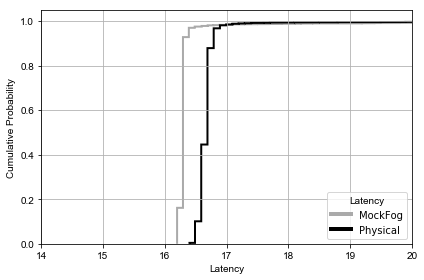

In [13]:
# Plot CDF

fig, ax = plt.subplots()
df.hist(bins=1000, label="MockFog", column=["mockfog"], cumulative=True, density=True, histtype='step', ax=ax, edgecolor='#AAAAAA', linewidth=2)
df.hist(bins=1000, label="Physical", column=["physical"], cumulative=True, density=True, histtype='step', ax=ax, edgecolor='#000000', linewidth=2)

# update x
ax.set_xlabel("Latency")

# update y
ax.set_ylabel("Cumulative Probability")

# update legend & set other font
markers = [Line2D([0], [0], color="#AAAAAA", lw=4),
                Line2D([0], [0], color="#000000", lw=4)]
ax.legend(markers, ["MockFog", "Physical"], loc="lower right", title="Latency", prop={"family": "Palatino"})

plt.xlim(14,20)
# set font
plt.rcParams['font.family'] = 'Palatino'
ax.set_title("")
fig.tight_layout()
fig.savefig(dataDir + "/cdf.pdf")